# 木構造 (Tree Structure)

## 実装計画

1. ノードクラスの定義
2. 二分木の基本操作実装
3. 木の走査メソッド実装

## 実装例


In [ ]:
class Node:
    def __init__(self, value):
        self.value = value  # ノードの値
        self.left = None  # 左の子
        self.right = None  # 右の子


class BinaryTree:
    def __init__(self):
        self.root = None

    def insert(self, value):
        if not self.root:
            self.root = Node(value)
        else:
            self._insert_recursive(self.root, value)

    def _insert_recursive(self, node, value):
        if value < node.value:
            if node.left is None:
                node.left = Node(value)
            else:
                self._insert_recursive(node.left, value)
        else:
            if node.right is None:
                node.right = Node(value)
            else:
                self._insert_recursive(node.right, value)

    # 深さ優先探索（行きがけ順）
    def preorder(self, node):
        if node:
            print(node.value, end=" ")
            self.preorder(node.left)
            self.preorder(node.right)

    # 深さ優先探索（通りがけ順）
    def inorder(self, node):
        if node:
            self.inorder(node.left)
            print(node.value, end=" ")
            self.inorder(node.right)

## 木構造の特徴

- 親子関係を持つ階層構造
- 再帰的な構造
- 用途:
  - ファイルシステム
  - データベースのインデックス
  - 構文解析木
- 探索の時間複雑度: O(log n) (平衡木の場合)

1 種類のライセンスで類似のコードが見つかりました


# 木構造の用語

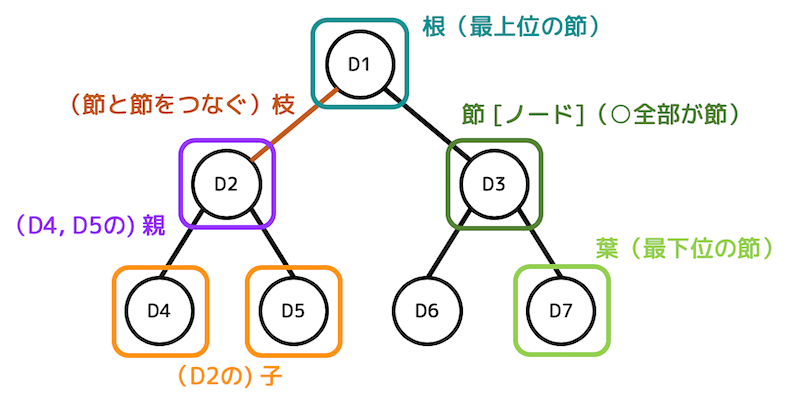 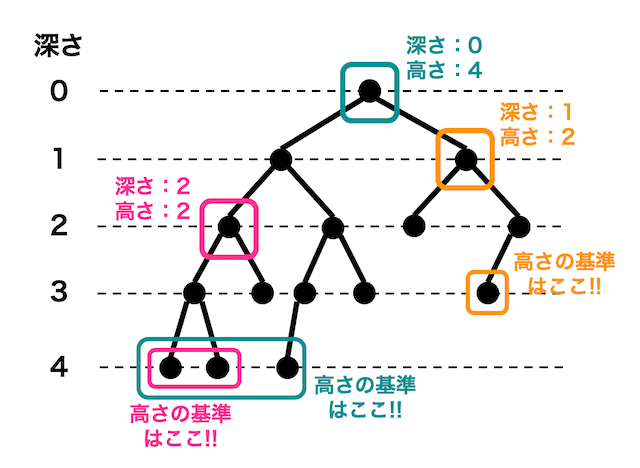


# 木構造における関係性

## 計画

1. Node クラスの拡張
2. 親への参照を追加
3. 関係性を取得するメソッドの実装

## 実装


In [ ]:
class Node:
    def __init__(self, value):
        self.value = value
        self.parent = None  # 親への参照
        self.left = None  # 左の子
        self.right = None  # 右の子


class RelationshipTree:
    def __init__(self):
        self.root = None

    def get_ancestors(self, node):
        """先祖ノードのリストを返す"""
        ancestors = []
        current = node.parent
        while current:
            ancestors.append(current)
            current = current.parent
        return ancestors

    def get_descendants(self, node):
        """子孫ノードのリストを返す"""
        descendants = []
        if node.left:
            descendants.append(node.left)
            descendants.extend(self.get_descendants(node.left))
        if node.right:
            descendants.append(node.right)
            descendants.extend(self.get_descendants(node.right))
        return descendants

    def get_siblings(self, node):
        """兄弟ノードのリストを返す"""
        siblings = []
        if node.parent:
            if node.parent.left and node.parent.left != node:
                siblings.append(node.parent.left)
            if node.parent.right and node.parent.right != node:
                siblings.append(node.parent.right)
        return siblings

## 関係性の定義

- **先祖**: あるノードから根に向かって辿れるすべてのノード
- **子孫**: あるノードから葉に向かって辿れるすべてのノード
- **兄弟**: 同じ親を持つノード


# python の二分木


In [ ]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None  # 左の子
        self.right = None  # 右の子

    def __str__(self):
        return str(self.value)


top = Node(1)
top.left = Node(2)
top.right = Node(3)
top.left = top.left
top.right = top.right


def height(node):
    if node.left != None:
        left_height = height(node.left) + 1
    else:
        left_height = 0
    if node.right != None:
        right_height = height(node.right) + 1
    else:
        right_height = 0
    return max(left_height, right_height)


def depth(node, x):
    if node.value == x:
        return 0

    if node.left != None:
        left_depth = depth(node.left, x)
        if left_depth >= 0:
            return left_depth + 1

    if node.right != None:
        right_depth = depth(node.right, x)
        if right_depth >= 0:
            return right_depth + 1

    return -1

# 二分木の探索


## 行きがけ順

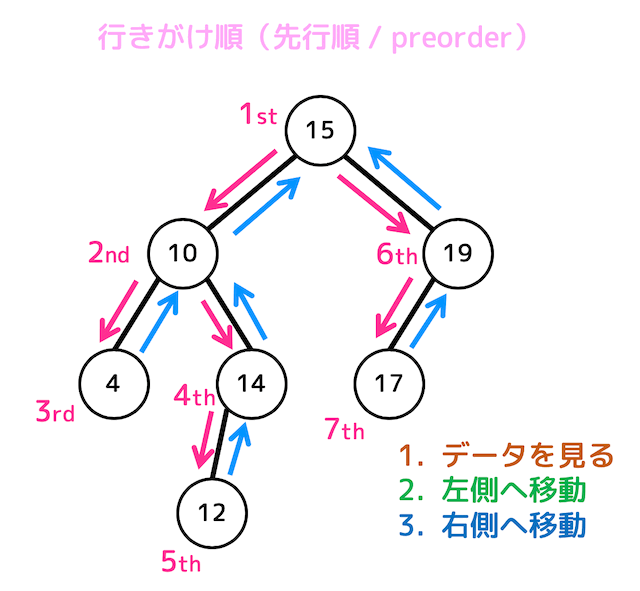

## 実装


In [ ]:
def print_preorder(node):
    print(node, end=", ")
    if node.left != None:
        print_preorder(node.left)
    if node.right != None:
        print_preorder(node.right)

## 通り掛け順

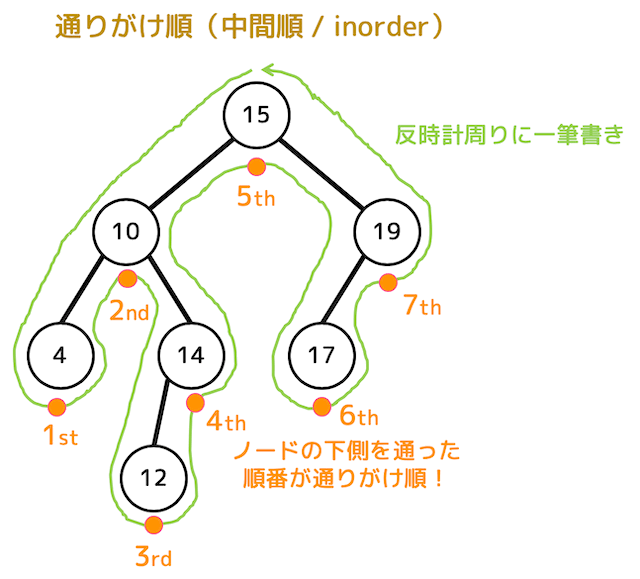

## 実装方法


In [ ]:
def print_inorder(node):
    if node.left != None:
        print_inorder(node.left)
    print(node, end=", ")
    if node.right != None:
        print_inorder(node.right)

## 帰りがけ

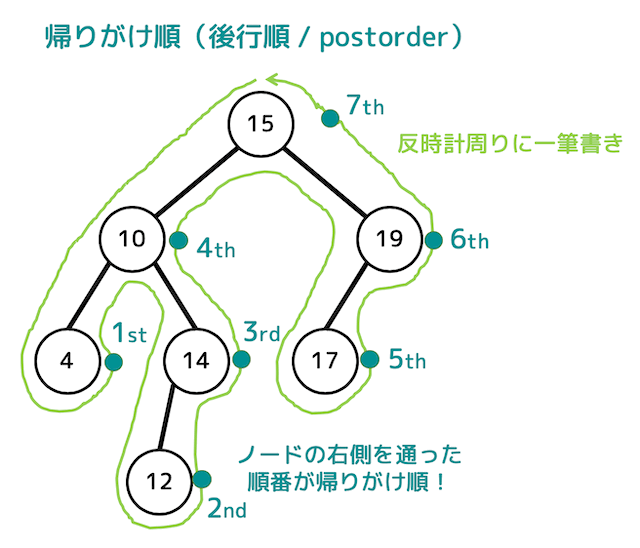

## 実装


In [ ]:
def print_postorder(node):
    if node.left != None:
        print_postorder(node.left)
    if node.right != None:
        print_postorder(node.right)
    print(node, end=", ")

# 数式の木 (Expression Tree)

## 実装計画

1. ノードクラスの定義
2. 式の解析と木の構築
3. 式の評価メソッド
4. 走査方法の実装


In [ ]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None


class ExpressionTree:
    def __init__(self):
        self.root = None

    def is_operator(self, char):
        return char in ["+", "-", "*", "/"]

    def evaluate(self, node):
        if not self.is_operator(node.value):
            return float(node.value)

        left_val = self.evaluate(node.left)
        right_val = self.evaluate(node.right)

        if node.value == "+":
            return left_val + right_val
        if node.value == "-":
            return left_val - right_val
        if node.value == "*":
            return left_val * right_val
        if node.value == "/":
            return left_val / right_val

    def inorder(self, node):
        """中置記法での出力"""
        if node:
            if self.is_operator(node.value):
                print("(", end="")
            self.inorder(node.left)
            print(node.value, end="")
            self.inorder(node.right)
            if self.is_operator(node.value):
                print(")", end="")


# 使用例
"""
   *
  / \
 +   4
/ \
2  3

式: (2+3)*4 = 20
"""

ワークスペース情報を収集しています

# 数式の記法の種類

## 1. 中置記法 (Infix Notation)

- 最も一般的で人間が読みやすい形式
- 演算子を 2 つのオペランドの間に配置
- 例: `3 + 4`、`(1 + 2) * 3`
- 特徴:
  - 括弧が必要
  - 演算子の優先順位を考慮する必要あり

## 2. 前置記法 (Prefix Notation / Polish Notation)

- 演算子を 2 つのオペランドの前に配置
- 例: `+ 3 4`、`* + 1 2 3`
- 特徴:
  - 括弧が不要
  - 演算子の優先順位を考慮する必要なし
  - 左から右に読む

## 3. 後置記法 (Postfix Notation / Reverse Polish Notation)

campe.ipynb

に示されているように:

- 演算子を 2 つのオペランドの後に配置
- 例: `3 4 +`、`1 2 + 3 *`
- 特徴:
  - 括弧が不要
  - スタックを使用して評価可能
  - 計算機での処理に適している

## 変換例

中置記法: `(1 + 2) * 3`

- 前置記法: `* + 1 2 3`
- 後置記法: `1 2 + 3 *`


## 特徴

- 各ノードは演算子または数値
- 中置記法、前置記法、後置記法で表現可能
- 再帰的に式を評価
- 優先順位の表現が容易

chapter4.ipynb

の応用実装です。
